# Exploratory Data Analysis

## Import Libraries 

In [1]:
import os
import json
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from PIL import Image
import numpy as np

## Load Images and Annotation

In [2]:
images_path = '../dataset/bdd100k/images/100K/images/100k/train'
annotation_path = '../dataset/bdd100k/labels/det_20/det_train.json'

In [3]:
len(os.listdir('../dataset/bdd100k/images/100K/images/100k/val'))

10000

In [4]:
with open(annotation_path, 'r') as f:
    db = json.load(f)

## Utility Function

In [5]:
def plot_conditions(set, list):
    x = []
    y = []

    for condition in set:
        x.append(condition)
        y.append(list.count(condition))
    
    return x, y

In [6]:
def plot_weather_conditions(db):
    weather = []
    for annotation in tqdm(db):
        weather.append(annotation['attributes']['weather'])
    
    unique_weather = set(weather)
    x ,y = plot_conditions(unique_weather, weather)
    
    plt.bar(x, y, color=['orange', 'blue', 'olive', 'gray', 'purple', 'green', 'pink'])
    plt.xticks(rotation='vertical')
    plt.xlabel('Weather Condition')
    plt.ylabel('Number of images')
    
    plt.savefig('weather_conditions.png')
    plt.show()

In [7]:
def plot_scene_conditions(db):
    scene = []
    for annotation in tqdm(db):
        scene.append(annotation['attributes']['scene'])
    
    unique_scene = set(scene)
    x ,y = plot_conditions(unique_scene, scene)
    
    plt.bar(x, y, color=['orange', 'blue', 'olive', 'gray', 'purple', 'green', 'pink'])
    plt.xticks(rotation='vertical')
    plt.xlabel('Scene')
    plt.ylabel('Number of images')
    plt.savefig('scene_conditions.png')
    plt.show()

In [8]:
def plot_timeofday_conditions(db):
    timeofday = []
    for annotation in tqdm(db):
        timeofday.append(annotation['attributes']['timeofday'])
    
    unique_timeofday = set(timeofday)
    x ,y = plot_conditions(unique_timeofday, timeofday)
    
    plt.bar(x, y, color=['orange', 'blue', 'olive', 'gray', 'purple', 'green', 'pink'])
    plt.xticks(rotation='vertical')
    plt.xlabel('Time of the Day')
    plt.ylabel('Number of images')
    plt.savefig('timeofday_conditions.png')
    
    plt.show()

In [9]:
def number_of_bouding_box(db):
    numbers = []
    for annotation in db:
        if 'labels' in annotation.keys():
            numbers.append(len(annotation['labels']))
    
    
    number_set = set(numbers)
    x = []
    y = []
    for number in number_set:
        x.append(number)
        y.append(numbers.count(number))
    
    plt.figure(figsize=(10,10))
    plt.bar(x, y)
    plt.xlabel('Number of bounding box per image')
    plt.ylabel('Number of images')
    plt.savefig('bbox_distribution.png')
    plt.show()

In [10]:
def bounding_boxes_per_category(category_name, db):
    w_plot = []
    h_plot = []
    for annotation in db:
        if 'labels' in annotation.keys():
            boxes = annotation['labels']
            for box in boxes:
                if box['category'] == category_name:
                    x1 = box['box2d']['x1']
                    y1 = box['box2d']['y1']
                    x2 = box['box2d']['x2']
                    y2 = box['box2d']['y2']

                    w_plot.append(round(x2 - x1))
                    h_plot.append(round(y2 - y1))
    
    return w_plot, h_plot

In [11]:
def plot_bounding_boxes(db):
    colors = []
    for color in mcolors.TABLEAU_COLORS:
        colors.append(mcolors.TABLEAU_COLORS[color])
    categories = []
    for annotation in db:
        if 'labels' in annotation.keys():
            for label in annotation['labels']:
                categories.append(label['category'])
            
    
    categories_set = set(categories)
    categories_set.remove('other person')
    categories_set.remove('other vehicle')
    
    plt.figure(figsize=(15, 15))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle("Daily closing prices", fontsize=18, y=0.95)
    
    for idx, category in enumerate(categories_set):
        w, h = bounding_boxes_per_category(category, db)
        ax = plt.subplot(4, 3, idx + 1)
        ax.scatter(w, h, alpha=0.8, color=colors[idx if idx < len(colors) else 0], linewidths=0.5)
        ax.set_xlabel('Width')
        ax.set_ylabel('Height ')
        ax.set_title(f'Width vs Height of bounding boxes for {category}')
    plt.savefig('bbox_wh.png')
    plt.show()

In [12]:
def category_distributation(db):
    categories = []
    for annotation in db:
        if 'labels' in annotation.keys():
            for label in annotation['labels']:
                categories.append(label['category'])
            
    
    categories_set = set(categories)
    categories_set.remove('other person')
    categories_set.remove('other vehicle')
    x = []
    y = []
    for category in categories_set:
        x.append(category)
        y.append(categories.count(category))
    
    
    #plt.figure(figsize=(15,15))
    plt.bar(x, y)
    plt.xticks(rotation='vertical')
    plt.xlabel('Category Type')
    plt.ylabel('Number of instances')
    plt.show()

## Scene 

100%|████████████████████████████████████████████████████████████████████████| 69863/69863 [00:00<00:00, 895394.06it/s]


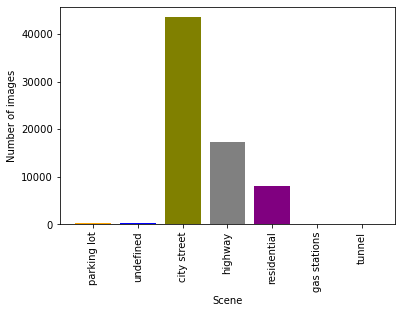

In [13]:
plot_scene_conditions(db)

## Time of the Day

100%|████████████████████████████████████████████████████████████████████████| 69863/69863 [00:00<00:00, 944190.41it/s]


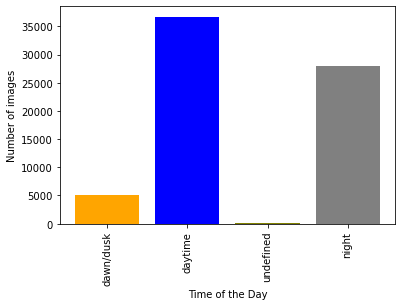

In [14]:
plot_timeofday_conditions(db)

## Weather Condition 

100%|████████████████████████████████████████████████████████████████████████| 69863/69863 [00:00<00:00, 851482.58it/s]


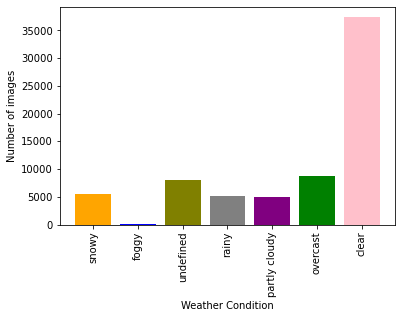

In [15]:
plot_weather_conditions(db)

## Bouding boxes Distributation

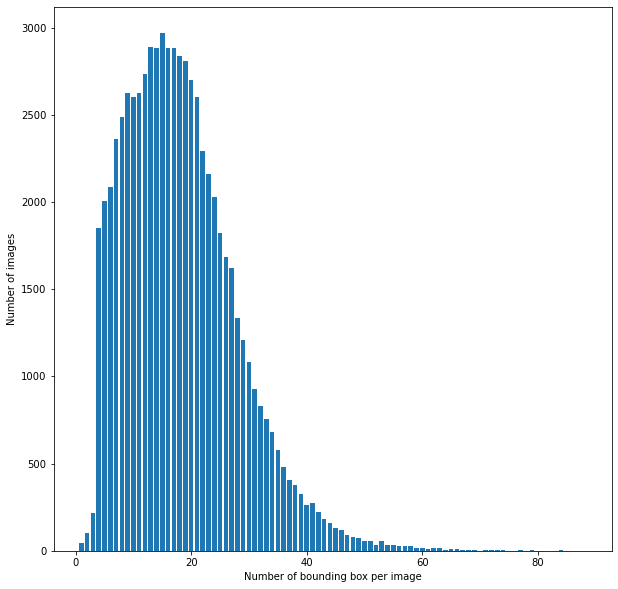

In [16]:
number_of_bouding_box(db)

## Category Distributation

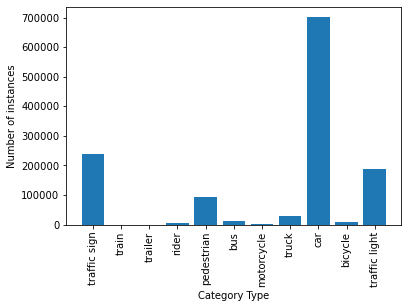

In [17]:
category_distributation(db)

## Width vs Heigh for Bounding Boxes 

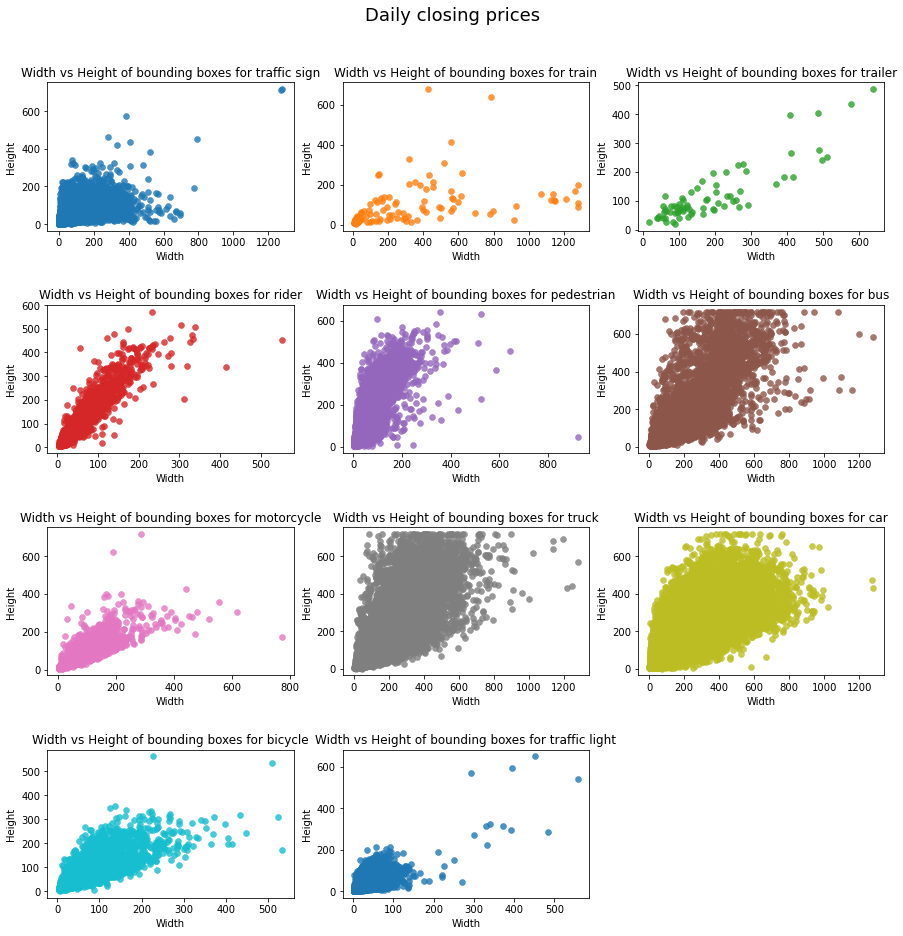

In [18]:
plot_bounding_boxes(db)